# Testowanie hipotez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Klasyczny algorytm testowania hipotez
1. postawić hipotezę zerową $H_0$ i hipotezę alternatywną $H_1$;
2. wyspecyfikować model matematyczny (np. zakładamy, że próba losowa pochodzi z rozkładu normalnego o nieznanej wariancji);
3. przyjąć poziom istotności $\alpha$;
4. obliczyć wartość statystyki testowej $T = T(X_1, \ldots, X_n)$
5. wyznaczyć obszar krytyczny $W_{\alpha}$ (w zależności od przyjętego poziomu istotności oraz hipotezy alternatywnej);
6. podjąć decyzję

    a) jeśli $T\in W_{\alpha}$, wówczas odrzuć hipotezę $H_0$,
    
    b) jeśli $T\not\in W_{\alpha}$, wówczas nie ma podstaw do odrzucenia hipotezy $H_0$;

## Algorytm testowania hipotez - przy użyciu $p$-wartości
1. postawić hipotezę zerową $H_0$ i hipotezę alternatywną $H_1$;
2. wyspecyfikować model matematyczny;
3. przyjąć poziom istotności $\alpha$;
4. obliczyć wartość statystyki testowej $T = T(X_1, \ldots, X_n)$
5. obliczyć $p$-wartość;
6. podjąć decyzję

    a) jeśli $p\leq\alpha$, wówczas odrzuć hipotezę $H_0$,

    b) jeśli $p>\alpha$, wówczas nie ma podstaw do odrzucenia hipotezy $H_0$;


## Testy dla wartości oczekiwanej
Załóżmy, że jesteśmy zainteresowaniu weryfikacją hipotezy dotyczącej wartości oczekiwanej $mu$:
$$
    H_0: \mu = \mu_0,
$$
wobec jednej z trzech hipotez alternatywnych
\begin{equation*}
    \begin{split}
        H_1&: \mu \neq \mu_0\\
        H_1'&: \mu < \mu_0\\
        H_1''&: \mu > \mu_0.
    \end{split}
\end{equation*}


## Test dla wartości oczekiwanej - model 1
Załóżmy, że badana cecha $X$ ma rozkład normalny $\mathcal{N(\mu, \sigma})$ o znanym odchyleniu standardowym $\sigma$. 

Statystyka testowa przyjmuje w tym przypadku postać
$$
    T = \frac{\overline{X} - \mu_0}{\sigma}\sqrt{n}.
$$

Przy założeniu prawdziwości hipotezy $H_0$ statystyka ma rozkład normalny standardowy $\mathcal{N}(0,1)$, z zwiążku z czym obszar krytyczny - w zależności od przyjętej hipotezy alternatywnej - ma postać
$$
W_{\alpha} = (-\infty, -z_{1-\frac{\alpha}{2}}]\cup[z_{1-\frac{\alpha}{2}}, +\infty),
$$

$$
W_{\alpha}^{'} = (-\infty, -z_{1-\alpha}],
$$

$$
W_{\alpha}^{''} =[z_{1-\alpha}, +\infty].
$$

Natomiast, w zależności od przyjętej hipotezy zerowej, $p$-wartość jest postaci
\begin{equation*}
    \begin{split}
        p-\text{value} &= P(|T|\geq |t|)\\
        p-\text{value} &= P(T < t)\\
        p-\text{value} &= P(T > t).
    \end{split}
\end{equation*}

**Zadanie - model 1.** Niech $X_1, \ldots, X_n$ oznacza próbę prostą o liczności $n=20$ z rozkładu normalnego o znanym odchyleniu standardowym $\sigma=0.8$.

a) Załóżmy, że średnia z tej próby wynosi 1.54. Wyznacz obszar krytyczny do weryfikacji hipotezy 
    \begin{equation*}
    \begin{split}
        H_0: \mu &= 1.6\\
        H_1: \mu &< 1.6,
    \end{split}
    \end{equation*}
    na poziomie istotności 0.05.
        
b) Oblicz $p$-value dla powyższego testu.
    
c) Ile wynosiłoby $p$-value, gdyby średnia z próby wynosiłaby 1.3?
    
d) Ile wynosiłoby $p$-value, gdybyśmy testowali rozważaną hipotezę zerową wobec dwustronnej hipotezy alternatywnej 
    $$
    H_1: \mu \neq 1.6
    $$

In [2]:
# a)

# przyjąć poziom istotności 𝛼
alpha = 0.05

# obliczyć wartość statystyki testowej 𝑇
X_mean = 1.54
mu0 = 1.6
sigma = 0.8
n = 20

T = np.sqrt(n) * (X_mean - mu0) / sigma
print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

# wyznaczyć obszar krytyczny 
z = stats.norm.ppf(q=1-alpha, loc=0, scale=1)
print("Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: {}".format(z))

critical = (-np.Inf, -z)
print("Obszar krytyczny: {}".format(critical))

# wniosek: wyznaczona wartość statystyki testowej nie należy do obszaru krytycznego, 
# nie mamy podstaw do odrzucenia hipotezy zerowej.

Wartość statystyki testowej T: -0.34
Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: 1.6448536269514722
Obszar krytyczny: (-inf, -1.6448536269514722)


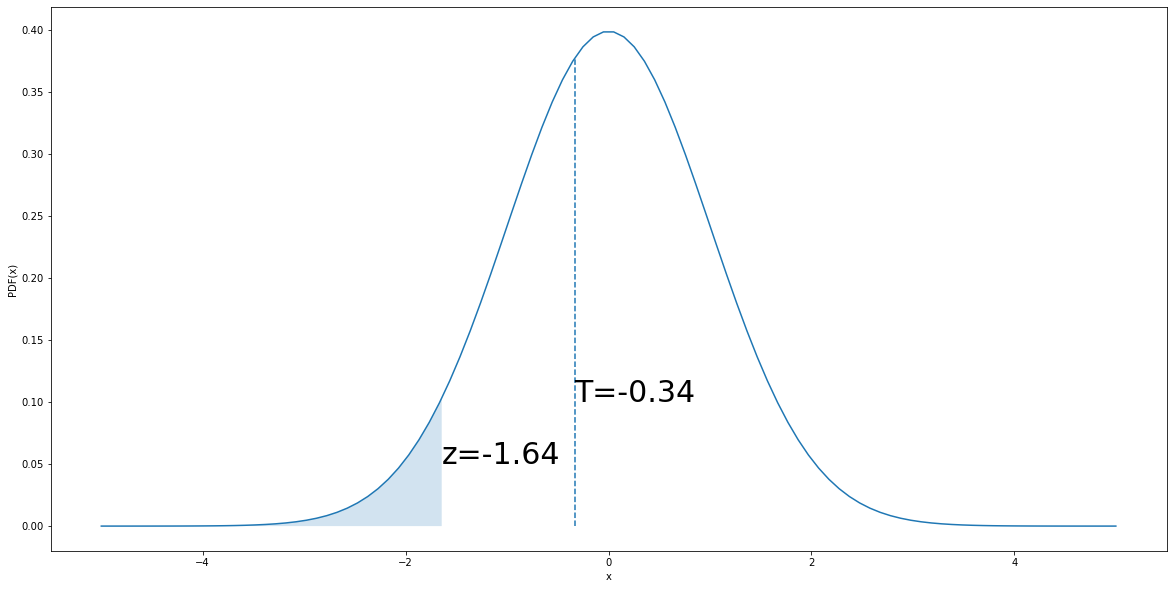

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

norm01 = stats.norm(loc=0, scale=1)

x0 = -z
a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, x0)
y = norm01.pdf(x)

ax.plot(x_value, norm01.pdf(x_value))
ax.fill_between(x, y, alpha=0.2)
ax.text(x0, 0.05, 'z={}'.format(np.round(x0, 2)), size=30)
ax.vlines(T, 0, norm01.pdf(T),  linestyles='--')
ax.text(T, 0.1, 'T={}'.format(np.round(T, 2)), size=30)
ax.set_xlabel('x')
ax.set_ylabel('PDF(x)')
plt.show()

In [4]:
# b) 

# p-value = P(T < t|H0) = CDF(t), gdzie t to wyznaczona wartosc statystyki testowej na podstawie probki
# T (przy zalozeniu prawdziwosci hipotezy zerowej) ma rozklad normalny standardowy

pval = stats.norm.cdf(x=T, loc=0, scale=1)
print("P-value: {}".format(pval)) # > 0.05

# wniosek: obliczona p-wartosc jest większa niż ustalony poziom istotności, 
# brak podstaw do odrzucenia hipotezy zerowej

P-value: 0.368657838608209


In [5]:
# c)

# obliczyć wartość statystyki testowej 𝑇
X_mean = 1.3
mu0 = 1.6
sigma = 0.8
n = 20

T = np.sqrt(n) * (X_mean - mu0) / sigma
print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

# wyznaczyć obszar krytyczny 
z = stats.norm.ppf(q=1-alpha, loc=0, scale=1)
print("Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: {}".format(-z))

critical = (-np.Inf, -z)
print("Obszar krytyczny: {}".format(critical))

pval = stats.norm.cdf(x=T, loc=0, scale=1)
print("P-value: {}".format(pval)) # < 0.05

# wniosek: wartość statystyki testowej należy do obszaru krytycznego, p-value jest mniejsze niż ustalony poziom 
# istotności, mamy podstawy do odrzucenia hipotezy zerowej.

Wartość statystyki testowej T: -1.68
Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: -1.6448536269514722
Obszar krytyczny: (-inf, -1.6448536269514722)
P-value: 0.046766256344546515


In [6]:
# d)

# przyjąć poziom istotności 𝛼
alpha = 0.05

# obliczyć wartość statystyki testowej 𝑇
X_mean = 1.54
mu0 = 1.6
sigma = 0.8
n = 20

T = np.sqrt(n) * (X_mean - mu0) / sigma
print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

# wyznaczyć obszar krytyczny 
z = stats.norm.ppf(q=1-alpha/2, loc=0, scale=1)
print("Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: {}".format(z))

critical_left = (-np.Inf, -z)
critical_right = (z, np.Inf)
print("Obszar krytyczny: {}  {}".format(critical_left, critical_right))

# p-value
# P(|T|>|t|) = P(T>|t|) + P(T<-|t|) = 1 - CDF(|t|) + CDF(-|t|) = 1 - CDF(|t|) + 1 - CDF(|t|) = 2(1-CDF(|t|))
pval = 2 * (1 - norm01.cdf(np.abs(T)))
print("P-value: {}".format(pval))

Wartość statystyki testowej T: -0.34
Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: 1.959963984540054
Obszar krytyczny: (-inf, -1.959963984540054)  (1.959963984540054, inf)
P-value: 0.737315677216418


In [7]:
def hypothesis_testing1(mu0, sigma, X_mean, n, alpha, alternative='two_sided'):

    T = np.sqrt(n) * (X_mean - mu0) / sigma
    print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

    if alternative != 'two_sided':
        z = stats.norm.ppf(q=1-alpha, loc=0, scale=1)
    else:
        z = stats.norm.ppf(q=1-alpha/2, loc=0, scale=1)
    print("Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: {}".format(z))

    if alternative == 'bottom':
        critical_left = (-np.Inf, -z)
        print("Obszar krytyczny: {}".format(critical_left))
        pval = stats.norm.cdf(T)
    elif alternative == 'upper':
        critical_right = (z, np.Inf)
        print("Obszar krytyczny: {}".format(critical_right))
        pval = 1 - stats.norm.cdf(T)
    else:
        critical_left = (-np.Inf, -z)
        critical_right = (z, np.Inf)
        print("Obszar krytyczny: {}  {}".format(critical_left, critical_right))
        pval = 2 * (1 - norm01.cdf(np.abs(T)))
        
    print("P-value: {}".format(pval))

**Zadanie - model 1**. Norma techniczna przewiduje średnio 64 sekundy na ułożenie w kartonie 100 tabliczek czekolady. Czas trwania tej czynności jest zmienną losową o rozkładzie normalnym z odchyleniem standardowym 10 sekund. Ponieważ robotnicy często skarżyli się, że norma jest źle ustalona, dokonano pomiaru czasu trwania tej czynności u losowo wybranych 225 robotników i otrzymano, że średni czas trwania czynności jest równy 65 s.
Czy na poziomie istotności 0.05 można stwierdzić, że średni czas czynności jest większy niż norma?

In [8]:
# H0: mu = 64 sek
# H1: my > 64

hypothesis_testing1(mu0=64, sigma=10, X_mean=65, n=225, alpha=0.05, alternative='upper')

Wartość statystyki testowej T: 1.5
Wartość kwantyla rozkładu normalnego standardowego rzędu 0.95: 1.6448536269514722
Obszar krytyczny: (1.6448536269514722, inf)
P-value: 0.06680720126885809


## Test dla wartości oczekiwanej - model 2
Jeżeli cecha $X$ ma rozkład normalny $\mathcal{N}(\mu, \sigma)$ o nieznanym odchyleniu standardowym $\sigma$, to do weryfikacji hipotezy $H_0$ wykonujemy test zbudowany na statystyce 
$$
    T = \frac{\overline{X} - \mu_0}{S}\sqrt{n},
$$
która przy założeniu prawdziwości hipotezy $H_0$ na rozkład $t$-Studenta o $n-1$ stopniach swobody.

W zależności od przyjętej hipotezy alternatywnej obszar krytyczny przybiera postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -t_{1-\frac{\alpha}{2}}^{[n-1]}]\cup[t_{1-\frac{\alpha}{2}}^{[n-1]}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -t_{1-\alpha}^{[n-1]}],\\
        W_{\alpha}^{''} &=[t_{1-\alpha}^{[n-1]}, +\infty].
    \end{split}
\end{equation*}

**Zadanie - model 2.** Dział kontroli jakości w zakładach chemicznych chce oszacować średnią wagę proszku do prania sprzedawanego w pudełkach o nominalnej wadze 3 kg. Pobrano w tym celu próbkę 9 pudełek proszku do prania. Każde pudełko zważono i otrzymano następujące wyniki (w kilogramach): 2.97, 3.04, 2.95, 3.01, 3.00, 2.99, 2.97, 3.05, 2.96. Wiadomo, że rozkład wagi pudełka proszku do prania jest normalny. Na poziomie istotności 0.01 sprawdzić, czy średnia waga proszku różni się istotnie od wagi nominalnej.

$X$ - zmienna losowa, opisująca wagę proszku do prania, $X\sim\mathcal{N}(\mu, \sigma)$, gdzie $\mu$ i $\sigma$ nieznane.

Testujemy hipoteze:
    \begin{equation*}
    \begin{split}
        H_0: \mu &= 3\\
        H_1: \mu &\neq 3,
    \end{split}
    \end{equation*}
na poziomie istotności $\alpha=0.01$.

In [9]:
n = 9
alpha = 0.01
mu0 = 3

X = [2.97, 3.04, 2.95, 3.01, 3.00, 2.99, 2.97, 3.05, 2.96]
X_mean = np.mean(X)
X_std = np.std(X, ddof=1)

t = np.sqrt(n) * (X_mean - mu0) / X_std
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(|T|>|t|) = 2 *(1-CDF(|t|))
pval = 2 * (1 - stats.t.cdf(x = np.abs(t), df = n - 1))
print("P-value: {}".format(pval))

# pvalue > 0.05, brak podstaw do odrzucenia hipotezy zerowej

Wartość statystyki testowej T: -0.57
P-value: 0.5834022940515253


In [10]:
t = stats.t.ppf(1 - alpha/2, df=n-1)
(-np.Inf, -t), (t, np.Inf)

((-inf, -3.3553873313333957), (3.3553873313333957, inf))

In [11]:
?stats.ttest_1samp

In [12]:
stats.ttest_1samp(a = X, popmean = mu0) 

Ttest_1sampResult(statistic=-0.5714285714285863, pvalue=0.5834022940515253)

**Zadanie - model 2.** Weryfikujemy hipotezę zerową mówiącą o tym, że średnia zawartość sacharozy w tabletkach homeopatycznych  pewnej  firmy  (średnia  w  populacji)  wynosi  2  mcg,  wobec  hipotezy alternatywnej mówiącej o tym, iż jest ona większa. Wiadomo z całą pewnością, iż rozkład zawartości sacharozy w tabletkach jest normalny. Zbadano 12 elementową próbę tabletek, której wyniki były następujące: 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3. Przy poziomie istotności $\alpha=0.05$ zweryfikować odpowiednie hipotezy. 

In [13]:
# H0 : mu = 2
# H1; mu > 2

n = 12
alpha = 0.05
mu0 = 2

X = [1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
X_mean = np.mean(X)
X_std = np.std(X, ddof=1)

t = np.sqrt(n) * (X_mean - mu0) / X_std
print("Wartość statystyki testowej T: {}".format(np.round(t, 3)))

# P(T>t) = 1-CDF(t)
pval = 1 - stats.t.cdf(x = t, df = n - 1)
print("P-value: {}".format(pval))

# pvalue > 0.05, brak podstaw do odrzucenia hipotezy zerowej

Wartość statystyki testowej T: 1.0
P-value: 0.16940034809810123


## Test dla wartości oczekiwanej - model 3
Jeżeli próba pochodzi z dowolnego rozkładu (posiadającego jednakże skończoną wariancję), ale jest wystarczająco duża ($n\geq 100)$, wówczas statystyka testowa przyjmuje postać
\begin{equation*}
    T = \frac{\overline{X} - \mu_0}{S}\sqrt{n}.
\end{equation*}

Przy założeniu prawdziwości hipotezy $H_0$ i dla dostatecznie dużej próby statystyka ma w przybliżeniu rozkład normalny standardowy $\mathcal{N}(0,1)$, w związku z czym obszar krytyczny --- w zależności od przyjętej hipotezy alternatywnej --- ma postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -z_{1-\frac{\alpha}{2}}]\cup[z_{1-\frac{\alpha}{2}}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -z_{1-\alpha}],\\
        W_{\alpha}^{''} &=[z_{1-\alpha}, +\infty].
    \end{split}
\end{equation*}

**Zadanie - model 3.** W wylosowanej niezależnie próbie 140 zakładów zbadano koszty własne produkcji pewnego wyrobu. Stwierdzono, że średnie koszty wynoszą 540 zł z odchyleniem standardowym 150 zł. Czy na poziomie istotności 0.1 można twierdzić, że średnie koszty produkcji danego typu wyrobu są wyższe niż 500 zł?

In [14]:
# H0: mu = 500
# H1: mu > 500

n = 140
mu0 = 500
X_mean = 540
X_std = 150
alpha = 0.1

t = np.sqrt(n) * (X_mean - mu0) / X_std
print("Wartość statystyki testowej T: {}".format(np.round(t, 3)))

# P(T>t) = 1-CDF(t)
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

# pval < poziom istotnosci => mamy podstawy do odrzucenia hipotezy zerowej 
# średnie koszty produkcji danego typu wyrobu są  istotnie wyższe niż 500 zł

Wartość statystyki testowej T: 3.155
P-value: 0.0008018236312070659


## Testy dla dwóch prób niezależnych
W praktyce istotną rolę odgrywają testy statystyczne, za pomocą których można porównywać wartości oczekiwane badanej cechy w dwóch różnych zbiorowościach statystycznych. 

W szczególności interesująca jest weryfikacja hipotezy, że obie porównywalne średnie sa jednakowe
\begin{equation*}
    H_0: \mu_1 = \mu_2,
\end{equation*}
przy jednej z trzech hipotez alternatywnych:
\begin{equation*}
    \begin{split}
        H_1&: \mu_1 \neq \mu_2\\
        H_1{'}&: \mu_1 < \mu_2\\
        H_1''&: \mu_1 > \mu_2.
    \end{split}
\end{equation*}

## Test dla dwóch prób niezależnych - model 1
Załóżmy, że próby $X_1, \ldots, X_{n_1}$ i $Y_1, \ldots, Y_{n_2}$ są niezależn i pochodzą z populacji o rozkładach normalnych, odpowiednio, $\mathcal{N}(\mu_1, \sigma_1)$ i $\mathcal{N}(\mu_2, \sigma_2)$ oraz odchylenia standardowe $\sigma_1$ i $\sigma_2$ są znane.

Wówczas statystyka testowa ma postać
$$
    T = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}.
$$
Statystyka przy założeniu prawdziwości hipotezy zerowej $H_0$ ma rozkład normalny $\mathcal{N}(0, 1)$. Obszar krytyczny --- w zależności od przyjętej hipotezy alternatywnej --- ma postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -z_{1-\frac{\alpha}{2}}]\cup[z_{1-\frac{\alpha}{2}}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -z_{1-\alpha}],\\
        W_{\alpha}^{''} &=[z_{1-\alpha}, +\infty].
    \end{split}
\end{equation*}

**Zadanie.** W celu porównania płac mężczyzn i kobiet zatrudnionych w pewnym dziale przemysłu pobrano próbkę losową 100 mężczyzn i 90 kobiet. Średnia płaca mężczyzn, obliczona na podstawie pobranej próbki, wyniosła 6280 zł, natomiast średnia płacy kobiet wyniosła 4210 zł. Na poziomie istotności 0.05 sprawdzić, czy średnia płaca kobiet zatrudnionych w tym dziale przemysłu jest istotnie niższa od średniej płacy mężczyzn. Zakładamy, że rozkład płacy mężczyzn i kobiet jest rozkładem normalnym z wariancjami, odpowiednio, 10000 zł$^2$ oraz 6400 zł$^2$.

$X$ - zmienna losowa, opisująca płace mężczyzn, $X\sim\mathcal{N}(\mu_1, \sigma_1)$, gdzie $\mu_1=?$ i $\sigma_1=100zł$.

$Y$ - zmienna losowa, opisująca płace kobiet, $X\sim\mathcal{N}(\mu_2, \sigma_2)$, gdzie $\mu_2=?$ i $\sigma_2=80zł$.


Testujemy hipoteze:
    \begin{equation*}
    \begin{split}
        H_0: \mu_1 &= \mu_2\\
        H_1: \mu_1 &> \mu_2,
    \end{split}
    \end{equation*}
na poziomie istotności $\alpha=0.05$.

In [15]:
n1 = 100
sigma1 = 100

n2 = 90
sigma2 = 80

X_mean = 6280
Y_mean = 4210

t = (X_mean - Y_mean) / np.sqrt((sigma1**2 / n1) + (sigma2**2 / n2))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T>t) = 1-CDF(t)
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

# pvalue < 0.05, mamy podstawy do odrzucenia hipotezy zerowej
# na poziomie istotności 0.05, średnia płaca mężczyzn jest istotnie większa niż średnia płaca kobiet.

Wartość statystyki testowej T: 158.25
P-value: 0.0


## Test dla dwóch prób niezależnych - model 2

Załóżmy, że próby $X_1, \ldots, X_{n_1}$ i $Y_1, \ldots, Y_{n_2}$ są niezależne i pochodzą z populacji o rozkładach normalnych, odpowiednio, $\mathcal{N}(\mu_1, \sigma_1)$ i $\mathcal{N}(\mu_2, \sigma_2)$ o nieznanych odchyleniach standardowych $\sigma_1$ i $\sigma_2$, ale równych, tzn. $\sigma_1=\sigma_2$.

Wówczas statystyka testowa ma postać
\begin{equation*}
    T = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n_1-1)S_1^2 + (n_2-1)S^2_2}{n_1+n_2-2}(\frac{1}{n_1}+\frac{1}{n_2})}}.
\end{equation*}
Statystyka przy założeniu prawdziwości hipotezy zerowej $H_0$ ma rozkład $t$-Studenta o $n_1+n_2-2$ stopniach swobody. Obszar krytyczny --- w zależności od przyjętej hipotezy alternatywnej --- ma postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -t_{1-\frac{\alpha}{2}}^{[n_1+n_2-2]}]\cup[t_{1-\frac{\alpha}{2}}^{[n_1+n_2-2]}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -t_{1-\alpha}^{[n_1+n_2-2]}],\\
        W_{\alpha}^{''} &=[t_{1-\alpha}^{[n_1+n_2-2]}, +\infty].
    \end{split}
\end{equation*}

**Zadanie - model 2.**  Zbadano dwie partie próbek 100 gramowych wątroby ze względu na zawartość węglowodanów. Zawartości węglowodanów dla I partii próbek (w g) były następujące: 15, 17, 16, 17, 18,5, 18, 17,5. Dla II partii liczącej $n=10$ próbek średnia zawartość węglowodanów wynosi $\overline{Y}=15,5$g i odchylenie standardowe $S_2=1,1$g. Na poziomie istotności $\alpha=0.05$ zweryfikować hipotezę, że badane partie próbek pochodzą z populacji generalnych o tej samej średniej zawartości węglowodanów.

In [16]:
# H0: mu1 = mu2
# H1: mu1 != mu2

X = [15, 17, 16, 17, 18.5, 17.5, 17.5]
n1 = len(X)
X_mean = np.mean(X)
X_std = np.std(X, ddof=1)
print(X_std)

1.1338934190276817


In [17]:
n2 = 10
Y_mean = 15.5
Y_std = 1.1

alpha = 0.05

t = (X_mean - Y_mean) / np.sqrt((1 / n1 + 1 / n2) * ((n1 - 1) * X_std ** 2 + (n2 - 1) * Y_std ** 2) / (n1 + n2 - 2))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

ta = stats.t.ppf(1 - alpha / 2, df = n1 + n2 - 2)
print("Obszar krytyczny: {} {}".format((-np.Inf, -ta), (ta, np.Inf)))

Wartość statystyki testowej T: 2.6
Obszar krytyczny: (-inf, -2.131449545559323) (2.131449545559323, inf)


**Zadanie - model 2.** Badano grubość płytek metalowych przed i po obróbce chemicznej. Dla 10 losowo wybranych płytek przed obróbką otrzymano średnią z próby 0.451 mm i wariancję z próby 0.02. Natomiast dla 15 losowo wybranych płytek po obróbce chemicznej otrzymano średnią z próby 0.550 mm z wariancją 0.017. Sprawdzić, czy grubość płytek zmienia się podczas obróbki. Założyć, że grubość płytek przed i po obróbce ma rozkład normalny o tej samej wariancji. Przyjąć poziom istotności 0.05.

In [18]:
n1 = 10
X_mean = 0.451
X_var = 0.02
print(X_std)

n2 = 15
Y_mean = 0.550
Y_var = 0.017

alpha = 0.05

l = (X_mean - Y_mean) 
m = (n1 - 1) * X_var + (n2 - 1) * Y_var
m *= (1 / n1) + (1 / n2)
m /=  (n1 + n2 - 2)
m = np.sqrt(m)

t = l / m
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

ta = stats.t.ppf(1 - alpha / 2, df = n1 + n2 - 2)
print("Obszar krytyczny: {} {}".format((-np.Inf, -ta), (ta, np.Inf)))

1.1338934190276817
Wartość statystyki testowej T: -1.8
Obszar krytyczny: (-inf, -2.0686576104190406) (2.0686576104190406, inf)


## Test dla dwóch prób niezależnych - model 3
Załóżmy, że próby $X_1, \ldots, X_{n_1}$ i $Y_1, \ldots, Y_{n_2}$ są niezależne i pochodzą z populacji o rozkładach normalnych, odpowiednio, $\mathcal{N}(\mu_1, \sigma_1)$ i $\mathcal{N}(\mu_2, \sigma_2)$ o nieznanych i różnych odchyleniach standardowych $\sigma_1$ i $\sigma_2$, tzn. $\sigma_1\neq\sigma_2$. Ponadto, próby są dostatecznie **duże**.

Wówczas statystyka testowa ma postać
\begin{equation*}
    T = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}.
\end{equation*}
Statystyka przy założeniu prawdziwości hipotezy zerowej $H_0$ ma rozkład normalny standardowy. Obszar krytyczny ma postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -z_{1-\frac{\alpha}{2}}]\cup[z_{1-\frac{\alpha}{2}}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -z_{1-\alpha}],\\
        W_{\alpha}^{''} &=[z_{1-\alpha}, +\infty].
    \end{split}
\end{equation*}

**Zadanie - model 3.** Wylosowana do badań budżetów rodzinnych w pewnym roku próba 120 rodzin zamieszkałych w Warszawie dała średnią 800 zł miesięcznych wydatków na mieszkanie oraz ochylenie standardowe 120 zł. Natomiast losowa próba 100 rodzin zamieszkałych w Łodzi dała średnią 650 zł miesięcznych wydatków na mieszkanie oraz odchylenie standardowe 150 zł. Przyjmując poziom istotności 0.01 zweryfikować hipotezę o jednakowych średnich wydatkach na mieszkanie rodzin w Warszawie i w Łodzi.

$X$ - zmienna losowa, opisująca miesięczne wydatki na mieszkanie w Warszawie,

$Y$ - zmienna losowa, opisująca miesięczne wydatki na mieszkanie w Łodzi,


Testujemy hipoteze:
    \begin{equation*}
    \begin{split}
        H_0: \mu_1 &= \mu_2\\
        H_1: \mu_1 &\neq\mu_2,
    \end{split}
    \end{equation*}
na poziomie istotności $\alpha=0.01$.

In [19]:
n1 = 120
n2 = 100 # proby dostatecznie duze

X_mean = 800
X_std = 120

Y_mean = 650
Y_std = 150

t = (X_mean - Y_mean) / np.sqrt(X_std**2 / n1 + Y_std**2 / n2)
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(|T|>|t|) = 2*(1-CDF(|t|))
pval = 2 * (1 - stats.norm.cdf(x = np.abs(t), loc=0, scale=1))
print("P-value: {}".format(pval)) 

# pvalue < 0.01, mamy podstawy do odrzucenia hipotezy zerowej
# na poziomie istotności 0.01, średnia miesięczne wydatki na mieszkanie istotnie różnią się 
# w Warszawie i w Łodzi

Wartość statystyki testowej T: 8.08
P-value: 6.661338147750939e-16


**Zadanie - model 3.** Porównano średnie ocen uzyskanych w ciągu ostatniego roku przez studentów dwóch równoległych lat informatyki i matematyki. Dla wydziału Informatyki średnia wyniosła 4.1 z wariancją 1.8, natomiast dla Wydziału Matematyki średnia wyniosła 3.6 z wariancją 2. Powyższe wyiki obliczono na podstawie 250 ocen uzyskanych przez studentów informatyki i 200 ocen studentów zarządzania. Na poziomie istotności 0.05 zweryfikować hipotezę, że przeciętne wyniki osiągane przez studentów informatyki są lepsze od przeciętnych wyników studentów matematyki.

In [20]:
n1 = 250
n2 = 200 # proby dostatecznie duze

X_mean = 4.1
X_var = 1.8

Y_mean = 3.6
Y_var = 2

t = (X_mean - Y_mean) / np.sqrt(X_var / n1 + Y_var / n2)
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(|T|>|t|) = 2*(1-CDF(|t|))
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval)) 

# pvalue < 0.01, mamy podstawy do odrzucenia hipotezy zerowej

Wartość statystyki testowej T: 3.81
P-value: 6.879406516269171e-05


## Testy dla wskaźnika struktury
Zakładamy, że próba pochodzi z rozkładu dwupunktowego. Weryfikowana hipoteza dotyczy nieznanego parametru $p$
\begin{equation*}
    H_0: p = p_0,
\end{equation*}
wobec jednej z trzech hipotez alternatywnych
\begin{equation*}
    \begin{split}
        H_1&: p \neq p_0\\
        H_1'&: p < p_0\\
        H_1''&:p > p_0.
    \end{split}
\end{equation*}

Do weryfikacji hipotezy $H_0$ wykorzystujemy wskaźnik struktury z próby 
\begin{equation*}
    \hat{p} = \frac{k}{n},
\end{equation*}
gdzie $k$ jest liczbą elementów wyróżnionych w próbie o liczności $n$.


## Test dla wskaźnika struktury - model 1
Jeżeli dysponujemy liczbą próbką $(n\geq 100)$, wówczas statystyka testowa ma postać 
\begin{equation*}
    T = \frac{k - np_0}{\sqrt{np_0(1-p_0)}}.
\end{equation*}
Na podstawie centralnego twierdzenia granicznego Moivre'a-Laplace'a wiemy, że statystyka $T$ ma w przybliżeniu rozkład $\mathcal{N}(0, 1)$. Obszar krytyczny --- w zależności od przyjętej hipotezy alternatywnej --- ma postać
\begin{equation*}
    \begin{split}
        W_{\alpha} &= (-\infty, -z_{1-\frac{\alpha}{2}}]\cup[z_{1-\frac{\alpha}{2}}, +\infty),\\
        W_{\alpha}^{'} &= (-\infty, -z_{1-\alpha}],\\
        W_{\alpha}^{''} &=[z_{1-\alpha}, +\infty].
    \end{split}
\end{equation*}


**Zadanie - model 1.** Umieralność na skutek drugiego zawału wynosi około 60%. Grupie studwudziestu pacjentom, którzy przeżyli zawał zaczęto podawać nowy lek. Dwudziestu z nich zmarło wskutek drugiego zawału. Czy można orzec, że nowy lek jest skuteczniejszy od stosowanych do tej pory? Przyjąć poziom istotności 0.05

$X$ - zmienna losowa, opisująca liczbe pacjentow po pierwszym zawale przyjmujących nowy lek, którzy zmarli wskutek drugiego zawału, $X\sim\text{Bin}(n=120, p=?)$.

Testujemy hipoteze:
    \begin{equation*}
    \begin{split}
        H_0: p &= 0.6\\
        H_1: p &< 0.6,
    \end{split}
    \end{equation*}
na poziomie istotności $\alpha=0.05$.

In [21]:
n = 120
k = 20
p0 = 0.6

t = (k - n * p0) / np.sqrt(n * p0 * (1 - p0))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T<t) = CDF(t)
pval = stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

# pval < 0.05, mamy podstawy do odrzucenia hipotezy zerowej 
# na poziomie istotności 0.05, przyjmujemy, że nowy lek istotnie skuteczniejszy od leków stosowanych do tej pory

Wartość statystyki testowej T: -9.69
P-value: 1.6687117023288663e-22


**Zadanie - model 1.** W losowej próbie 500 mieszkańców pewnego rejonu będących w wieku produkcyjnym znalazło się 126 bezrobotnych. Czy na poziomie istotności 0,05 można stwierdzić, że stopa bezrobocia w tym rejonie jest większa od 20%?

In [22]:
# H0 : p = 0.2
# H1: p > 0.2


n = 500
k = 126
p0 = 0.2

t = (k - n * p0) / np.sqrt(n * p0 * (1 - p0))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T>t) = 1 - CDF(t)
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

Wartość statystyki testowej T: 2.91
P-value: 0.0018252172022209523


### Zadania
1. Automat wytwarza tabliczki czekolady o nominalnej wadze 250g. Wiadomo, że rozkład wagi produkowanych tabliczek jest normalny z odchyleniem standardowym 5g. Kontrola techniczna pobrała próbę losową 16 tabliczek czekolady i otrzymała średnią wagę tabliczki równą 244g. Czy można na tej podstawie stwierdzić, że automat się rozregulował i zaniża wagę tabliczek? Zweryfikować odpowiedniąhipotezę na poziomie istotności 0.05.

2.  Zbadano $n=140$ wylosowanych gospodarstw domowych w pewnym mieście ze względu na wysokość miesięcznych opłat za energię elektryczną. Spośród nich 84 gospodarstwa domowe płaciły miesięcznie za energię co najmniej 80 zł. Czy na poziomie istotności $\alpha=0,05$ można stwierdzić, że procent gospodarstw domowych, których miesięczne opłaty za energię elektryczną wynosiły co najmniej 80 zł jest mniejszy niż 70%?

3. Fabryka zakupiła nowy agregat. Producent zapewnia, że przeciętnie tylko jeden na 100 wyprodukowanych przez ten agregat detali jest wadliwy. Aby to sprawdzić, wylosowano 500 detali i okazało się, że 20 z nich nie spełnia normy jakości. Czy na podstawie takiego wyniku badań można obalić zapewnienie producenta agregatu? Przyjąć poziom istotności 0.1.

4. W wyniku obserwacji dziennej liczby zakupów dokonywanych przez gospodarstwa domowe w mieście i na wsi ustalono, że liczby zakupów mają rozkład normalny z odchyleniami standardowymi, równymi odpowiednio, 6 i 3. Wybrano 16 gospodarst domowych w mieście i otrzymano średnią liczbę zakupów równą 20, a dla 9 gospodarstw domowych na wsi otrzymano średnią liczbę zakupów równą 16. Przyjmując poziom istotności 0.01, sprawdzić hipotezę, że średnia liczba zakupów dokonywanych dziennie przez rodziny na wsi jest mniejsza niż średnia liczba zakupów dokonywanych przez rodziny w mieście.

5. Producent kondensatorów twierdzi, że mają one przeciętną pojemność 4.5 pF. Istnieje podejrzenie, że producent nieuczciwie zawyża tę wartość. Zakładając, że pojemność jest zmienną losową o rozkładzie normalnym $\mathcal{N}(\mu, 0.1)$, na poziomie istotności $\alpha=0.1$, stawiając odpowiednią hipotezę sprawdzić, czy podejrzenie jest zasadne. W obliczeniach uwzględnić, że w wyniku 10 pomiarów pojemności kondensatorów otrzymano $\overline{X}=4.47$pF. 

6. Producent  luksusowych  wyrobów  żywności  ekologicznej  twierdzi,  iż  średnia  zawartość bezwartościowych  substancji  w  opakowaniu  jego  wyrobu  nie  przekracza  1  mg  w  całej produkcji.  Zbadano  próbę  prostą  100  opakowań  jego  produktu.  Średnia  zawartość bezwartościowych  substancji  otrzymana  na  podstawie  100  elementowej  próby  prostej wyniosła  1,45  mg,  natomiast  wariancja  9  (mg$^2$). Przy  poziomie  istotności $\alpha=0.01$ zweryfikować  hipotezę  zerową  mówiącą  o  tym,  ze  średnia  zawartość  bezwartościowych substancji  w  opakowaniu wyrobu tego producenta w całej produkcji wynosi 1 mg wobec hipotezy alternatywnej mówiącej o tym, że jest ona wyższa. Zakładamy, że rozkłąd zawartości bezwartościowych substancji w opakowaniu jest normalny.

### Odpowiedzi

In [23]:
# 1)

# H0: mu = 250
# H1: mu < 250

n = 16
mu0 = 250
X_mean = 244
sigma = 5
alpha = 0.05

T = np.sqrt(n) * (X_mean - mu0) / sigma
print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

# wyznaczyć obszar krytyczny 
z = stats.norm.ppf(q=1-alpha, loc=0, scale=1)

critical = (-np.Inf, -z)
print("Obszar krytyczny: {}".format(critical))

# wniosek: wartosc statystyki testowej należy do obszaru krytycznego
# ma poziomie istotności mamy podstawy do odrzucenia hipotezy zerowej, 
# automat istotnie zaniża wage tabliczki czekolady

Wartość statystyki testowej T: -4.8
Obszar krytyczny: (-inf, -1.6448536269514722)


In [24]:
# 2)

# H0: p = 0.7
# H1: p < 0.7

p0 = 0.7
n = 140
k = 84
alpha = 0.05

t = (k - n * p0) / np.sqrt(n * p0 * (1 - p0))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T<t) = CDF(t)
pval = stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

# pval < 0.05 => mamy podstawy do odrzucenia H0
# procent gospodarstw domowych, których miesięczne opłaty za energię elektryczną 
# wynosiły co najmniej 80 zł jest istotnie mniejszy niż 70%

Wartość statystyki testowej T: -2.58
P-value: 0.004911637253759624


In [25]:
# 3)

# H0: p = 0.01
# H1: p != 0.01

p0 = 0.01
n = 500
k = 20
alpha = 0.1

t = (k - n * p0) / np.sqrt(n * p0 * (1 - p0))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(|T|>|t|) = 2 * (1 - CDF(t))
pval = 2 * (1 - stats.norm.cdf(x = np.abs(t), loc=0, scale=1))
print("P-value: {}".format(pval))

# pvalue > 0.1
# na poziomie istotnosci 0.1 mamy podstawy do odrzucenia H0

Wartość statystyki testowej T: 6.74
P-value: 1.5622170224105503e-11


In [26]:
# 4)


# H0: mu1 = mu2
# H1: mu1 > mu2

n1 = 16
sigma1 = 6
X_mean = 20

n2 = 9
sigma2 = 3
Y_mean = 16

alpha = 0.01

t = (X_mean - Y_mean) / np.sqrt((sigma1**2 / n1) + (sigma2**2 / n2))
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T>t) = 1-CDF(t)
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

# na poziomie istotnosci 0.01 brak podstaw do odrzucenia H0
# brak istotnych roznic w średniej liczbie zakupów dokonywanych dziennie przez rodziny na wsi 
# i średniej liczby zakupów dokonywanych przez rodziny w mieście.

Wartość statystyki testowej T: 2.22
P-value: 0.013250140301245938


In [27]:
# 5)

# H0: mu = 4.5
# H1: mu < 4.5

mu0 = 4.5
sigma = 0.1
X_mean = 4.47
n = 10

alpha = 0.1

T = np.sqrt(n) * (X_mean - mu0) / sigma
print("Wartość statystyki testowej T: {}".format(np.round(T, 2)))

# wyznaczyć obszar krytyczny 
z = stats.norm.ppf(q=1-alpha, loc=0, scale=1)

critical = (-np.Inf, -z)
print("Obszar krytyczny: {}".format(critical))

# statystyka testowa nie należy do obszaru krytycznego
# na poziomie istotnosci 0.1 nie mamy podstaw do odrzucenia H0

Wartość statystyki testowej T: -0.95
Obszar krytyczny: (-inf, -1.2815515655446004)


In [28]:
# 6)

# H0: mu = 1
# H0: mu > 1

n = 100
mu0 = 1
X_mean = 1.45
X_std = 3

t = np.sqrt(n) * (X_mean - mu0) / X_std
print("Wartość statystyki testowej T: {}".format(np.round(t, 2)))

# P(T>t) = 1 - CDF(t)
pval = 1 - stats.norm.cdf(x = t, loc=0, scale=1)
print("P-value: {}".format(pval))

Wartość statystyki testowej T: 1.5
P-value: 0.06680720126885809
